In [1]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re

paragraph = """Being mentally ill is not a joke. It is a most painful thing. 
               If you have physical ailments, you will get everyone’s compassion, 
               but when you have a mental ailment, you will get laughter, unfortunately. 
               This is because it is very difficult to make out when someone is sick and when someone is being stupid. 
               This is the biggest problem for those who have someone in the family who is mentally disturbed. 
               You do not know when they are making it up and when they are really suffering. 
               You do not know when to be compassionate, when to be hard on them.
               Human sanity is a very fragile thing. The line between sanity and insanity is so thin. 
               If you push it every day, some day you will cross it. When you get angry, what is the expression that is used? 
               “I am mad with you,” or, “I am mad right now.” You may enjoy that little bit of madness – you crossed the line, 
               and it felt like some kind of freedom and power. But one day when you cannot cross back, that is when suffering begins.
               It is not like physical pain – it is immense suffering.
               I have been around people who have been mentally ill, trying to help them. No one should have it. 
               But unfortunately it is becoming an epidemic in the world.
               It is happening on a large scale in Western societies. India is not going to be far behind. Urban societies in India will especially move in this direction because in many ways, urban India is more West than West. There are more people in denims here than in America!
               Mental illnesses are growing like never before because we are pulling out all the supports that people have,
               but we are not replacing those supports with anything. If people become so conscious and capable within themselves, 
               everything would be fine even if you pulled all the supports. 
               But without giving that competence, if you just pull the supports, people will crack
               For a long time, we have been banking on a few things for our mental and emotional stability. But now, all these things are being taken away. One of these things is family. Family gives us a certain support – no matter what happened, there was always someone for you. Everyone else is with you when you do the right things. If you do the wrong things, they will distance themselves. Family was one bunch of people who were like a net for the circus that you did. Whichever way you fell, there was someone to hold you for some moments. But that net is gone for many people these days. Now, when you fall, you fall. Because of that, people are cracking up.
               In Indian culture, there was a time in the tradition when thirty percent of the population were monks.
               Consciously, they chose to live without family, to live without support, 
               to live without a home – homelessness not out of deprivation, but by choice. 
               None of them ever had depression because they transcended the need for the net.
               If you learned your trapeze bar act really well, you can do it without the net. 
               But if you are not good at it, you better have a net, otherwise your head will crack. 
               That is all that is happening. We are taking off the traditional support system that we had.
               Another aspect is religion. Religion handled human psychological balance effortlessly. 
               “God is with you, don’t worry.” This settled a whole lot of people. 
               Do not underestimate the value of that. Today, people are trying to go to psychiatrists. 
               India does not have enough psychiatrists for 1.3 billion people. No country does. 
               And above all, they are very inefficient because they can take only one client at a time, 
               and they need a lot of furniture! With all due respect, we must acknowledge this aspect of religion. 
               It is very inexpensive mass psychiatry"""



In [2]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [3]:
# Preparing the dataset
sentences = nltk.sent_tokenize(text)
sentences

['being mentally ill is not a joke.',
 'it is a most painful thing.',
 'if you have physical ailments, you will get everyone’s compassion, but when you have a mental ailment, you will get laughter, unfortunately.',
 'this is because it is very difficult to make out when someone is sick and when someone is being stupid.',
 'this is the biggest problem for those who have someone in the family who is mentally disturbed.',
 'you do not know when they are making it up and when they are really suffering.',
 'you do not know when to be compassionate, when to be hard on them.',
 'human sanity is a very fragile thing.',
 'the line between sanity and insanity is so thin.',
 'if you push it every day, some day you will cross it.',
 'when you get angry, what is the expression that is used?',
 '“i am mad with you,” or, “i am mad right now.” you may enjoy that little bit of madness – you crossed the line, and it felt like some kind of freedom and power.',
 'but one day when you cannot cross back, th

In [4]:
sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

In [5]:
sent_word

[['being', 'mentally', 'ill', 'is', 'not', 'a', 'joke', '.'],
 ['it', 'is', 'a', 'most', 'painful', 'thing', '.'],
 ['if',
  'you',
  'have',
  'physical',
  'ailments',
  ',',
  'you',
  'will',
  'get',
  'everyone',
  '’',
  's',
  'compassion',
  ',',
  'but',
  'when',
  'you',
  'have',
  'a',
  'mental',
  'ailment',
  ',',
  'you',
  'will',
  'get',
  'laughter',
  ',',
  'unfortunately',
  '.'],
 ['this',
  'is',
  'because',
  'it',
  'is',
  'very',
  'difficult',
  'to',
  'make',
  'out',
  'when',
  'someone',
  'is',
  'sick',
  'and',
  'when',
  'someone',
  'is',
  'being',
  'stupid',
  '.'],
 ['this',
  'is',
  'the',
  'biggest',
  'problem',
  'for',
  'those',
  'who',
  'have',
  'someone',
  'in',
  'the',
  'family',
  'who',
  'is',
  'mentally',
  'disturbed',
  '.'],
 ['you',
  'do',
  'not',
  'know',
  'when',
  'they',
  'are',
  'making',
  'it',
  'up',
  'and',
  'when',
  'they',
  'are',
  'really',
  'suffering',
  '.'],
 ['you',
  'do',
  'not',


In [6]:
#sent_word = [nltk.word_tokenize(sentence) for sentence in sentences]

for i in range(len(sent_word)):
    sent_word[i] = [word for word in sent_word[i]
                    if word not in stopwords.words('english')]

In [9]:
sent_word

[['mentally', 'ill', 'joke', '.'],
 ['painful', 'thing', '.'],
 ['physical',
  'ailments',
  ',',
  'get',
  'everyone',
  '’',
  'compassion',
  ',',
  'mental',
  'ailment',
  ',',
  'get',
  'laughter',
  ',',
  'unfortunately',
  '.'],
 ['difficult', 'make', 'someone', 'sick', 'someone', 'stupid', '.'],
 ['biggest', 'problem', 'someone', 'family', 'mentally', 'disturbed', '.'],
 ['know', 'making', 'really', 'suffering', '.'],
 ['know', 'compassionate', ',', 'hard', '.'],
 ['human', 'sanity', 'fragile', 'thing', '.'],
 ['line', 'sanity', 'insanity', 'thin', '.'],
 ['push', 'every', 'day', ',', 'day', 'cross', '.'],
 ['get', 'angry', ',', 'expression', 'used', '?'],
 ['“',
  'mad',
  ',',
  '”',
  ',',
  '“',
  'mad',
  'right',
  'now.',
  '”',
  'may',
  'enjoy',
  'little',
  'bit',
  'madness',
  '–',
  'crossed',
  'line',
  ',',
  'felt',
  'like',
  'kind',
  'freedom',
  'power',
  '.'],
 ['one', 'day', 'cross', 'back', ',', 'suffering', 'begins', '.'],
 ['like', 'physical', 

In [11]:
# Training the Word2Vec model
model = Word2Vec(sent_word, min_count=1)


words = model.wv.vocab

In [12]:
# Test the word vectors
vector = model.wv[ 'compassion']

print(vector)

[ 2.4129911e-03 -3.8663782e-03  3.9811814e-03  3.2971043e-03
 -2.4590055e-03 -3.1871744e-03  1.0687334e-03  1.3143534e-03
 -4.5755170e-03  4.5103566e-03 -4.1166511e-03 -4.4494050e-04
  1.6558357e-03  3.2223072e-03 -1.9852682e-03 -6.4911466e-04
 -2.6195019e-03  3.1358493e-04 -4.4823037e-03  4.8321681e-03
  7.2990282e-04  3.3195091e-03  3.0564917e-03  2.9049113e-03
 -4.4994042e-03  2.0203239e-03 -2.7194575e-03 -3.3766613e-03
  1.4126061e-03  2.8318795e-04 -4.6708095e-03  8.9167122e-04
 -3.7145473e-03  2.6049525e-03 -2.1477521e-03 -1.9777741e-03
  4.1108853e-03  2.0486340e-03 -4.2132312e-04  5.2796095e-04
 -3.8474798e-03  3.3345619e-05  4.4216383e-03  1.7583201e-04
 -2.1792236e-03 -4.3437774e-03 -4.4430955e-03  4.2851791e-03
  1.7923134e-03  1.6380602e-03 -1.2172785e-03  1.5963592e-03
 -3.2699271e-04  4.2138970e-03 -4.0646032e-03 -2.0330373e-04
  3.3620291e-03 -4.8391903e-03  4.9327295e-03  3.0427547e-03
 -3.9773160e-03  3.3517045e-04  1.8300409e-03 -4.5099417e-03
 -1.5716749e-03 -9.27869

In [14]:
# Most similar words
similar = model.wv.most_similar( 'compassion',topn=20)

similar

[('illnesses', 0.2408488690853119),
 ('compassionate', 0.22921639680862427),
 ('unfortunately', 0.22881966829299927),
 ('another', 0.20781974494457245),
 ('stability', 0.2054746001958847),
 ('may', 0.19760315120220184),
 ('.', 0.19470246136188507),
 ('respect', 0.19393719732761383),
 ('many', 0.17657099664211273),
 ('everything', 0.17474637925624847),
 ('even', 0.16585436463356018),
 ('way', 0.16414035856723785),
 ('head', 0.15801958739757538),
 ('now.', 0.14888645708560944),
 ('effortlessly', 0.14731287956237793),
 ('away', 0.14027097821235657),
 ('long', 0.13935934007167816),
 ('trapeze', 0.13771113753318787),
 ('trying', 0.1295580118894577),
 ('felt', 0.12695643305778503)]

C:\Users\Vikash\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


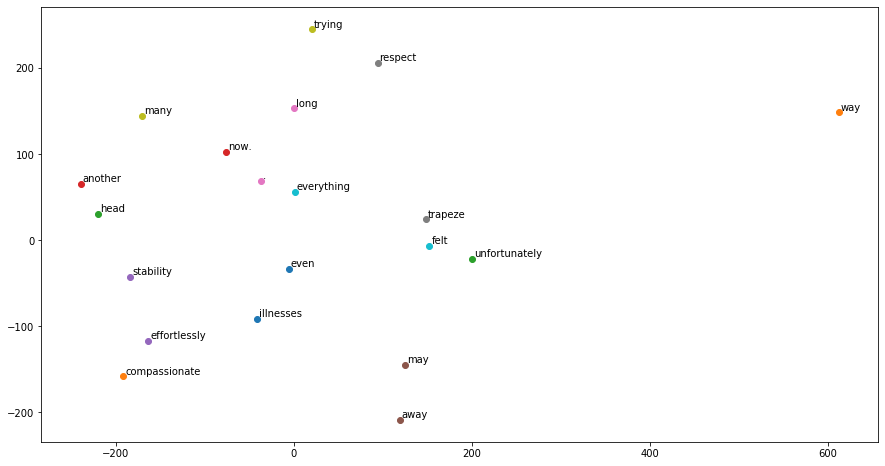

In [21]:
from sklearn.manifold import  TSNE
vocab = ['illnesses','compassionate','unfortunately','another','stability','may','.','respect','many','everything',
         'even','way','head','now.','effortlessly','away','long','trapeze','trying','felt']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')

    plt.show()

tsne_plot(model)